# Evaluating Performance
This notebook evaluates the total execution time and peak memory usage of the py_graspi graph generation and descriptor computation pipeline and displays it in a histogram.

The following cell imports the necessary libraries as well as prints the working directory for confirmation that the notebook is in the correct folder. It should end with '/performance_tests'.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import defaultdict

import os
cwd = os.getcwd()
print(cwd)  #the last part should be .../py-graspi/tests

/Users/laibahahmed/PycharmProjects/PythonProject/py-graspi/tests/performance_tests


Next, we define some helper functions. This one parses the numeric value found in the filename, assuming it's following the appropriate naming conventions, and uses this later to sort and extract size.

In [2]:
def extract_numbers(filename):
    """Extract numbers from a filename for sorting and size extraction."""
    return tuple(map(int, re.findall(r'\d+', filename)))

This helper function below groups files by naming convention pattern. It does this by replacing the numbers found in the filename with '#', then looking for shared naming pattern.

In [3]:
def group_files_by_pattern(files):
    """Group file names by replacing numeric values with a placeholder (#)."""
    pattern_groups = defaultdict(list)
    for file in files:
        pattern = re.sub(r'\d+(?:\.\d+)?', '#', file)
        pattern_groups[pattern].append(file)
    return pattern_groups

The following cell contains the main function used to compute and plot the total execution time and memory usage. It loads a specified CSV file with timing/memory results, and calculates the total execution time and memory using this data. It then goes through the files in the file pattern groups and computes the pixel count. Finally, it plots the execution time and peak memory usage against the pixel count for each file pattern group.

In [4]:
def plot_execution_and_memory_pixel_count_cleaned(csv_file):
    df = pd.read_csv(csv_file)
    df['total_execution_time'] = df['descriptor_time'] + df['graph_time']
    df['peak_memory_usage_gb'] = df[['graph_mem', 'descriptor_mem']].max(axis=1) / 1e9
    df['size'] = df['Test File'].str.extract(r'(\d+)').astype(int)
    df['pixel_count'] = (df['size'] ** 2).astype(int)

    pattern_groups = group_files_by_pattern(df['Test File'])

    for pattern, files in pattern_groups.items():
        subset = df[df['Test File'].isin(files)].copy()
        subset.sort_values('pixel_count', inplace=True)

        x_values = subset['pixel_count']
        x_labels = [str(x) for x in x_values]

        plt.figure(figsize=(10, 8))  # Adjusted figure size

        # Execution time plot
        ax1 = plt.subplot(2, 1, 1)
        ax1.plot(x_labels, subset['total_execution_time'], marker='o', linestyle='-', color='blue')
        ax1.set_xlabel('Total Pixel Count (e.g., 10x10 → 100)', fontsize=12)
        ax1.set_ylabel('Time (s)', fontsize=12)
        ax1.set_title('Total Execution Time', fontsize=14)
        ax1.tick_params(axis='both', labelsize=10)
        ax1.grid(True)

        # Memory usage plot
        ax2 = plt.subplot(2, 1, 2)
        ax2.plot(x_labels, subset['peak_memory_usage_gb'], marker='s', linestyle='-', color='green')
        ax2.set_xlabel('Total Pixel Count (e.g., 10x10 → 100)', fontsize=12)
        ax2.set_ylabel('Memory Usage (GB)', fontsize=12)
        ax2.set_title('Peak Memory Usage', fontsize=14)
        ax2.tick_params(axis='both', labelsize=10)
        ax2.grid(True)

        plt.tight_layout(pad=1.0)  # Reduced padding
        plt.show()

This final cell runs the function, taking in a specified CSV file containing the statistics of generating graphs and computing descriptors for each file. This can be changed as necessary.

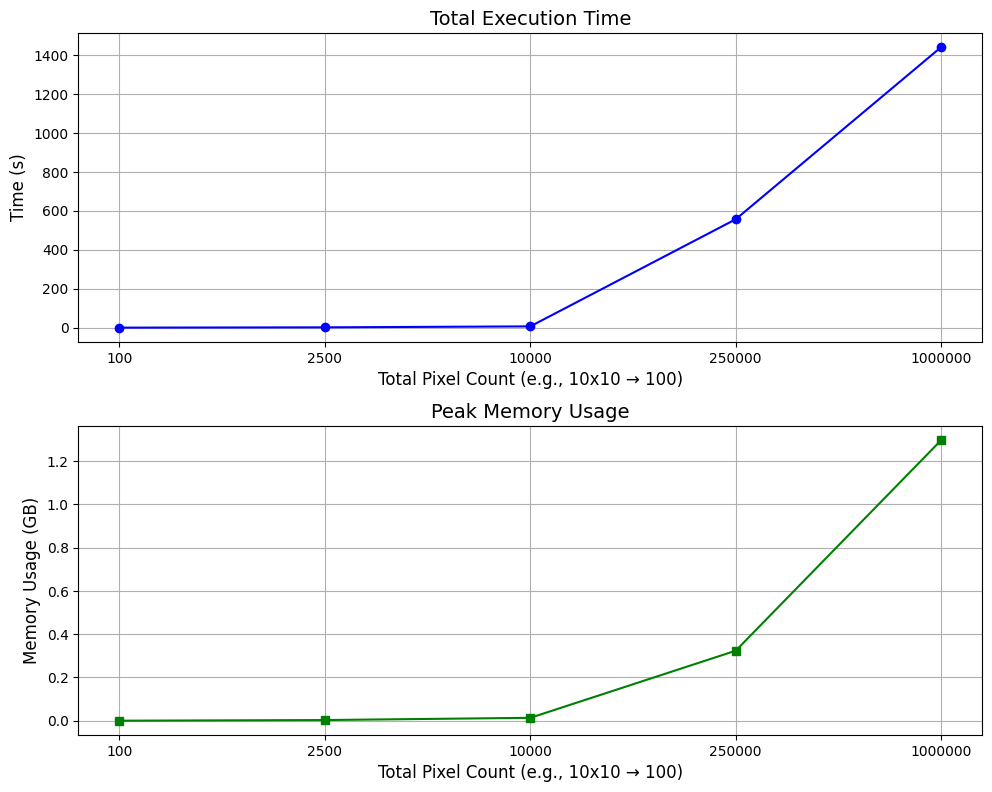

In [5]:
plot_execution_and_memory_pixel_count_cleaned(cwd+"/performance_results/stats_new_2D.csv")